## 第38课 基于信用卡交易欺诈非均衡数据的处理(2)

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


### Imbalanced datasets can be use cases in various domains:

Finance: Fraud detection datasets commonly have a fraud rate of ~1–2%

Ad Serving: Click prediction datasets also don’t have a high clickthrough rate.

Transportation/Airline: Will Airplane failure occur?

Medical: Does a patient has cancer?

Content moderation: Does a post contain NSFW content?

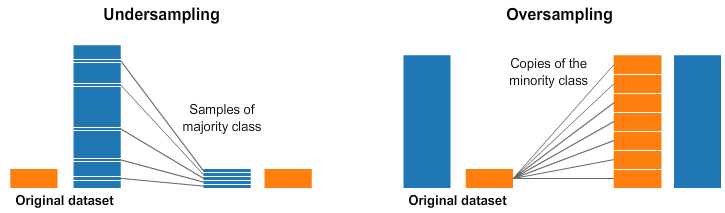

In [1]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson37-dealing imbalance data.png')

In [54]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.metrics import precision_score
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [55]:
data = pd.read_csv('Lesson37-creditcard.csv',sep=',')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
Y = data['Class']

In [8]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [6]:
X = data.drop('Class',axis=1,inplace=False)

In [58]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [7]:
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Exploratory Data Analysis

In [10]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

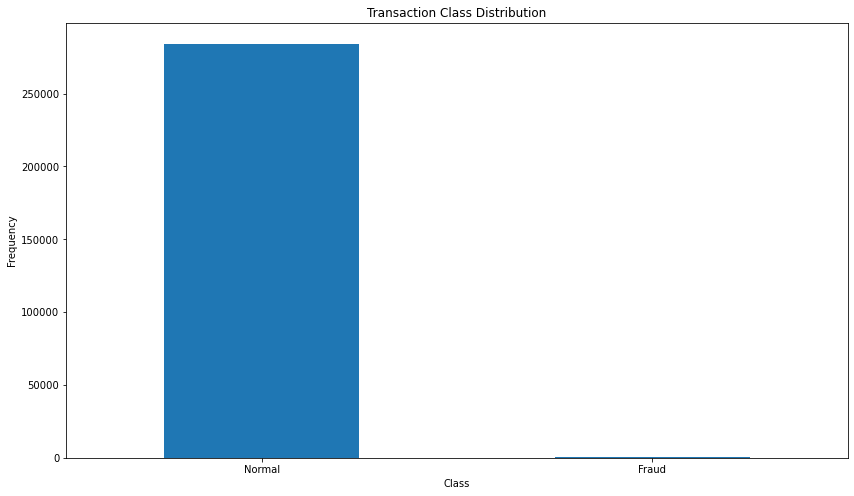

In [11]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [12]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [13]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [15]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[85296,    12],
       [   33,   102]], dtype=int64)

Confusion matrix:
 [[85296    12]
 [   33   102]]


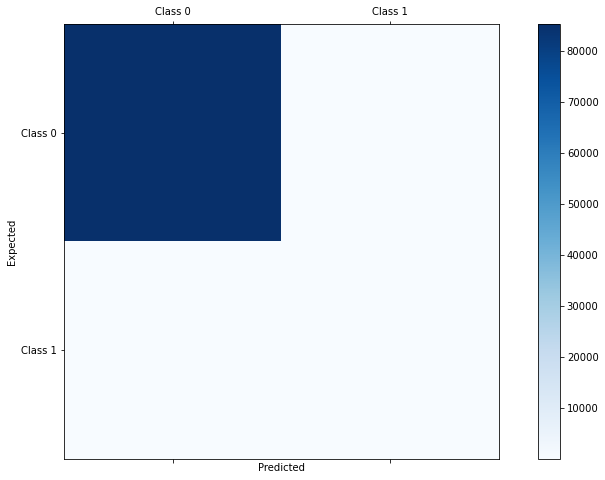

In [16]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## (1.1) under_sampling NearMiss

In [17]:
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


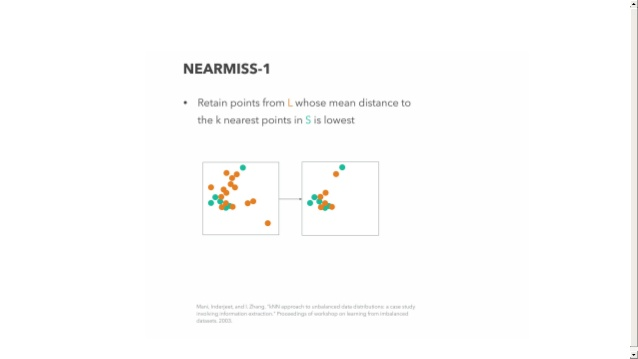

In [18]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson37-python-resampling.jpg')

In [19]:
# Implementing Undersampling for Handling Imbalanced 
#nm = NearMiss(random_state=42)
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,Y)

In [20]:
X_res.shape,y_res.shape

((984, 30), (984,))

In [21]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.27%


In [23]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[140,   2],
       [ 12, 142]], dtype=int64)

In [24]:
precision_score(y_test, y_pred)

0.9861111111111112

## (1.2) under_sampling RandomUnderSampler

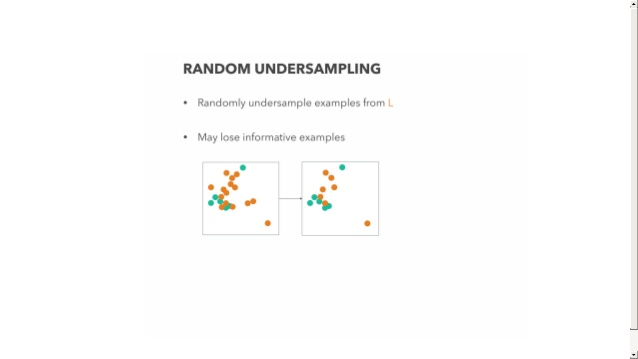

In [25]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson37-python-resampling-16-638.jpg')

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X, Y)
X_res, y_res = rus.fit_sample(X, Y)

In [27]:
X_res.shape,y_res.shape

((984, 30), (984,))

In [28]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.59%


In [30]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[139,   3],
       [ 13, 141]], dtype=int64)

In [31]:
precision_score(y_test, y_pred)

0.9791666666666666

## under_sampling
## Advantages
It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

## Disadvantages
It can discard potentially useful information which could be important for building rule classifiers.
The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.

## (2.1) over_sampling SMOTETomek 

https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.over_sampling

Synthetic Minority Oversampling Technique(SMOTE) 

Tomek link:A pair of examples is called a Tomek link if they belong to different classes and are each other's nearest neighbors. Undersampling can be done by removing all tomek links from the dataset

Class to perform over-sampling using SMOTE and cleaning using Tomek links.

Combine over- and under-sampling using SMOTE and Tomek links.

In [56]:
from imblearn.combine import SMOTETomek

# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

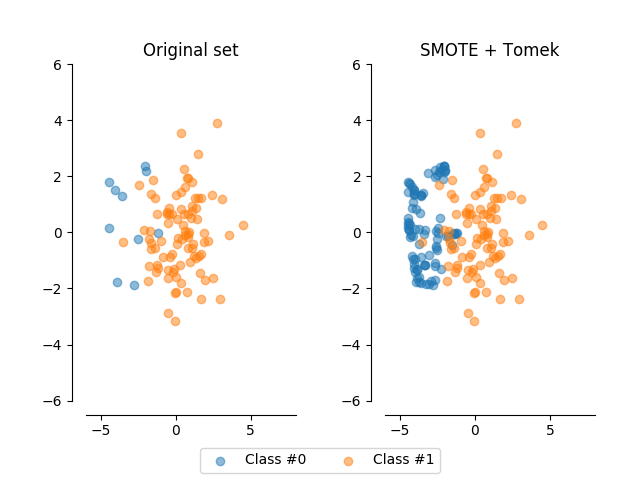

In [57]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson38-oversampling2.png')

In [59]:
X_res.shape,y_res.shape

((567562, 30), (567562,))

In [60]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.73%


In [62]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[84746,   547],
       [ 1618, 83358]], dtype=int64)

In [63]:
precision_score(y_test, y_pred)

0.9934807222453966

## (2.2) over_sampling RandomOverSampler 

In [41]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

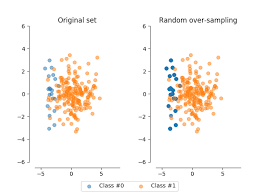

In [42]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson38-oversampling1.png')

In [46]:
os =  RandomOverSampler(random_state=10)

In [47]:
X_res, y_res = os.fit_sample(X, Y)

In [49]:
X_res.shape,y_res.shape

((568630, 30), (568630,))

In [50]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.39%


In [52]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[84739,   689],
       [  344, 84817]], dtype=int64)

In [53]:
precision_score(y_test, y_pred)

0.9919420859354899

## over_sampling
## Advantages
Unlike under sampling this method leads to no information loss.
Outperforms under sampling
## Disadvantages
It increases the likelihood of overfitting since it replicates the minority class events.

## (3) Penalize Algorithms (Cost-Sensitive Training)

using penalized learning algorithms that increase the cost of classification mistakes on the minority class

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#scaler = StandardScaler()
#Xstan = scaler.fit_transform(X)

In [ ]:
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X_train, y_train)
 
# Predict on training set
pred_y_3 = clf_3.predict(X_test)

## (4) Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier using, class_weights we can specify a higher weight for the minority class using a dictionary.



In [66]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(class_weight={0:1,1:10})

## (5) from sklearn.utils.class_weight import compute_class_weightclass_weights = compute_class_weight('balanced', np.unique(y), y)

## (6) Use Tree-Based Algorithms

. Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we'll jump right into those

In [64]:
from sklearn.ensemble import RandomForestClassifier

## (7) Change Your Performance Metric

For a general-purpose metric for classification, we recommend Area Under ROC Curve (AUROC).

Note: if you got an AUROC of 0.47, it just means you need to invert the predictions because Scikit-Learn is misinterpreting the positive class. AUROC should be >= 0.5.

In [65]:
from sklearn.metrics import roc_auc_score

## (8) neural network (待续）